## data gdrive

In [ ]:
!pip install gdown

import gdown

# Google Drive shareable link
drive_link = "https://drive.google.com/uc?id=1SbSzU-mnxubhL5p62J1zunqkJkAvWCK4"  # Replace FILE_ID with the file's unique ID
output_path = "dataset.zip"  # Name of the downloaded file

# Download the file
gdown.download(drive_link, output_path, quiet=False)

# Unzip the file
import zipfile

with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall("./dataset")

print("Dataset downloaded and extracted to './dataset'")


Downloading...
From (original): https://drive.google.com/uc?id=1SbSzU-mnxubhL5p62J1zunqkJkAvWCK4
From (redirected): https://drive.google.com/uc?id=1SbSzU-mnxubhL5p62J1zunqkJkAvWCK4&confirm=t&uuid=5584abd9-4bbb-41d6-8108-f2fe2e91293c
To: /content/dataset.zip
100%|██████████| 714M/714M [00:11<00:00, 61.2MB/s]


Dataset downloaded and extracted to './dataset'


In [ ]:
import os
import zipfile

# Unzip the file
output_path = "dataset.zip"
extract_dir = "./dataset"

with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset downloaded and extracted to '{extract_dir}'")

# Search for data.yaml in the extracted directory
data_yaml_path = None
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        if file == "data.yaml":
            data_yaml_path = os.path.join(root, file)
            break

if data_yaml_path:
    print(f"'data.yaml' file found at: {data_yaml_path}")
else:
    print("'data.yaml' file not found in the extracted dataset!")


Dataset downloaded and extracted to './dataset'
'data.yaml' file found at: ./dataset/data.yaml


In [ ]:
!pip install torch torchvision ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.1/899.1 kB 22.7 MB/s eta 0:00:00


In [ ]:
import os
import yaml

# Path to extracted dataset and data.yaml
dataset_dir = "./dataset"
data_yaml_path = os.path.join(dataset_dir, "data.yaml")

# Load the data.yaml file
with open(data_yaml_path, 'r') as file:
    data_yaml = yaml.safe_load(file)

# Update paths
data_yaml['train'] = os.path.join(dataset_dir, "train/images")
data_yaml['val'] = os.path.join(dataset_dir, "valid/images")
if 'test' in data_yaml:
    data_yaml['test'] = os.path.join(dataset_dir, "test/images")

# Save the updated data.yaml file
with open(data_yaml_path, 'w') as file:
    yaml.dump(data_yaml, file)

print(f"Updated data.yaml saved to: {data_yaml_path}")


Updated data.yaml saved to: ./dataset/data.yaml


In [ ]:
# Check if the paths exist and contain images
for split in ['train', 'valid']:
    images_path = os.path.join(dataset_dir, f"{split}/images")
    if not os.path.exists(images_path):
        print(f"Error: {images_path} does not exist!")
    elif len(os.listdir(images_path)) == 0:
        print(f"Error: {images_path} is empty!")
    else:
        print(f"{images_path} contains {len(os.listdir(images_path))} images.")


./dataset/train/images contains 13774 images.
./dataset/valid/images contains 794 images.


In [ ]:
with open(data_yaml_path, 'r') as file:
    data_yaml = yaml.safe_load(file)
    print(data_yaml)


{'names': ['bay_leaf', 'bell_pepper', 'broccoli', 'cabbage', 'carrot', 'cauliflower', 'chicken', 'chickpeas', 'coriander', 'cucumber', 'egg', 'eggplant', 'fish', 'garlic', 'ginger', 'kumquat', 'lemon', 'long_pepper', 'mutton', 'okra', 'onion', 'pork', 'potato', 'pumpkin', 'radish', 'salt', 'shrimp', 'small_pepper', 'spring_onion', 'tofu', 'tomato', 'turmeric'], 'nc': 32, 'roboflow': {'license': 'BY-NC-SA 4.0', 'project': 'recipe-ingredients-2', 'url': 'https://universe.roboflow.com/food-w4zm1/recipe-ingredients-2/dataset/3', 'version': 3, 'workspace': 'food-w4zm1'}, 'test': './dataset/test/images', 'train': './dataset/train/images', 'val': './dataset/valid/images'}


In [ ]:
import glob

for split in ['train', 'valid']:
    images_path = os.path.join(dataset_dir, f"{split}/images")
    labels_path = os.path.join(dataset_dir, f"{split}/labels")

    # Count images and labels
    images = glob.glob(os.path.join(images_path, "*.jpg")) + glob.glob(os.path.join(images_path, "*.png"))
    labels = glob.glob(os.path.join(labels_path, "*.txt"))

    print(f"{split.capitalize()} set: {len(images)} images, {len(labels)} labels")

    # Check for images without corresponding labels
    missing_labels = [img for img in images if not os.path.exists(img.replace("images", "labels").replace(".jpg", ".txt").replace(".png", ".txt"))]
    if missing_labels:
        print(f"Missing labels for {len(missing_labels)} images in {split} set!")
        print(missing_labels)


Train set: 13774 images, 13774 labels
Missing labels for 10 images in train set!
['./dataset/train/images/images-47-_jpg.rf.2ba057bde8e46f078e0e5dd9ef9378b2.jpg', './dataset/train/images/images-41-_jpg.rf.96421229bffe6a4ab2f8040f6d3634c5.jpg', './dataset/train/images/images-24-_jpg.rf.106beb1e859dc20d2cfe13002cff76d0.jpg', './dataset/train/images/images-41-_jpg.rf.346a0ea5ff0abe9a1577b47b048f5b4c.jpg', './dataset/train/images/images-24-_jpg.rf.48be47870ecfae614040c7fa6a414389.jpg', './dataset/train/images/images-50-_jpg.rf.cb09790c7a73cf17e5a577e7f3354ede.jpg', './dataset/train/images/images-50-_jpg.rf.d45ff627c51846fa769f4d344ad00c8d.jpg', './dataset/train/images/images-14-_jpg.rf.8ebb5a6a7edc6907ef0189a6812b20f6.jpg', './dataset/train/images/images-10-_jpg.rf.5fafaa938127ba179bc1a5cefbc7ae9d.jpg', './dataset/train/images/images-10-_jpg.rf.7e4e0d169b4d8f26354c6787b9bdd40b.jpg']
Valid set: 794 images, 794 labels


In [ ]:
import yaml

yaml_path = "/content/dataset/data.yaml"

# Load and fix the YAML file
with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

data['train'] = '/content/dataset/train/images'
data['val'] = '/content/dataset/valid/images'

# Save the fixed YAML file
with open(yaml_path, 'w') as file:
    yaml.safe_dump(data, file)

print("Updated data.yaml paths:")
print(data)


Updated data.yaml paths:
{'names': ['bay_leaf', 'bell_pepper', 'broccoli', 'cabbage', 'carrot', 'cauliflower', 'chicken', 'chickpeas', 'coriander', 'cucumber', 'egg', 'eggplant', 'fish', 'garlic', 'ginger', 'kumquat', 'lemon', 'long_pepper', 'mutton', 'okra', 'onion', 'pork', 'potato', 'pumpkin', 'radish', 'salt', 'shrimp', 'small_pepper', 'spring_onion', 'tofu', 'tomato', 'turmeric'], 'nc': 32, 'roboflow': {'license': 'BY-NC-SA 4.0', 'project': 'recipe-ingredients-2', 'url': 'https://universe.roboflow.com/food-w4zm1/recipe-ingredients-2/dataset/3', 'version': 3, 'workspace': 'food-w4zm1'}, 'test': './dataset/test/images', 'train': '/content/dataset/train/images', 'val': '/content/dataset/valid/images'}


In [ ]:
from ultralytics import YOLO

# Initialize the model
model = YOLO('yolov8n.pt')

# Path to updated data.yaml
data_yaml_path = "/kaggle/working/dataset/data.yaml"

# Train the model
model.train(data=data_yaml_path, epochs=50, imgsz=640)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 83.0MB/s]


Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 17.7MB/s]


Overriding model.yaml nc=80 with nc=32

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 73.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/dataset/train/labels... 13774 images, 53 backgrounds, 0 corrupt: 100%|██████████| 13774/13774 [00:12<00:00, 1131.63it/s]


train: New cache created: /kaggle/working/dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 655, len(boxes) = 91781. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/dataset/valid/labels... 794 images, 1 backgrounds, 0 corrupt: 100%|██████████| 794/794 [00:00<00:00, 970.18it/s]


val: New cache created: /kaggle/working/dataset/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 10208. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.81G      1.295      2.358      1.385        153        640: 100%|██████████| 861/861 [02:28<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.04it/s]


                   all        794      10208      0.866      0.586       0.62        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.9G      1.223       1.21      1.327        180        640: 100%|██████████| 861/861 [02:25<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


                   all        794      10208      0.714      0.774      0.719      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.85G      1.225       1.11      1.324        231        640: 100%|██████████| 861/861 [02:23<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


                   all        794      10208      0.771      0.775      0.789      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.23G      1.222      1.052      1.327        109        640: 100%|██████████| 861/861 [02:22<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        794      10208       0.83      0.841       0.86      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.44G      1.191     0.9443      1.308        217        640: 100%|██████████| 861/861 [02:22<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.57it/s]


                   all        794      10208      0.817      0.847      0.878       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.55G      1.164     0.8595      1.292         96        640: 100%|██████████| 861/861 [02:22<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        794      10208      0.841      0.858      0.891      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.11G      1.142     0.8076      1.281        163        640: 100%|██████████| 861/861 [02:21<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        794      10208      0.876      0.857      0.895      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.04G      1.122     0.7688      1.272         83        640: 100%|██████████| 861/861 [02:22<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        794      10208      0.888      0.874      0.907      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.65G       1.12     0.7377      1.268        177        640: 100%|██████████| 861/861 [02:22<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        794      10208      0.886      0.877      0.913      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.88G      1.108     0.7111      1.261        158        640: 100%|██████████| 861/861 [02:21<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.13it/s]


                   all        794      10208      0.875      0.922      0.932      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.26G      1.092     0.6935      1.254        117        640: 100%|██████████| 861/861 [02:21<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        794      10208      0.837       0.93       0.93      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.95G      1.087     0.6792      1.249         88        640: 100%|██████████| 861/861 [02:22<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.75it/s]


                   all        794      10208       0.89      0.899       0.93      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.64G       1.07     0.6606       1.24        204        640: 100%|██████████| 861/861 [02:22<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]

                   all        794      10208      0.902      0.918      0.938      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.05G      1.068     0.6507      1.239        143        640: 100%|██████████| 861/861 [02:23<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        794      10208       0.89      0.922      0.936      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.79G       1.06     0.6404      1.239        119        640: 100%|██████████| 861/861 [02:22<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        794      10208      0.813      0.943      0.933      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.76G      1.055     0.6265       1.23        157        640: 100%|██████████| 861/861 [02:22<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        794      10208      0.866      0.929      0.939      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.07G      1.049     0.6204      1.227        133        640: 100%|██████████| 861/861 [02:22<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.70it/s]


                   all        794      10208      0.898      0.922      0.938      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.97G      1.041     0.6056      1.225        129        640: 100%|██████████| 861/861 [02:22<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.08it/s]


                   all        794      10208      0.896      0.914      0.929      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.89G      1.042     0.6058      1.224        191        640: 100%|██████████| 861/861 [02:22<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        794      10208      0.901      0.902      0.932      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.83G      1.032     0.5983      1.216        158        640: 100%|██████████| 861/861 [02:22<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]

                   all        794      10208      0.861      0.925      0.936      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.03G      1.021     0.5879      1.214        167        640: 100%|██████████| 861/861 [02:22<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        794      10208      0.876      0.902      0.932      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.59G      1.025     0.5931      1.219        152        640: 100%|██████████| 861/861 [02:22<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]


                   all        794      10208       0.91      0.915      0.932      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.61G      1.017     0.5856      1.212        150        640: 100%|██████████| 861/861 [02:21<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]


                   all        794      10208      0.837      0.927      0.924      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.24G      1.015     0.5725      1.207        111        640: 100%|██████████| 861/861 [02:22<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.83it/s]


                   all        794      10208      0.899      0.922      0.945      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.31G      1.007     0.5695        1.2        149        640: 100%|██████████| 861/861 [02:22<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        794      10208      0.914      0.902      0.934      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.91G      1.005     0.5609      1.198        154        640: 100%|██████████| 861/861 [02:22<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        794      10208      0.881       0.92      0.936      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.02G      1.006     0.5608        1.2        178        640: 100%|██████████| 861/861 [02:22<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        794      10208      0.905      0.918      0.948        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.46G     0.9989     0.5545      1.196        123        640: 100%|██████████| 861/861 [02:22<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.10it/s]


                   all        794      10208      0.892      0.923      0.937      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.06G     0.9923     0.5497      1.192        191        640: 100%|██████████| 861/861 [02:21<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.80it/s]

                   all        794      10208      0.906      0.921      0.948      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       3.3G     0.9837      0.541      1.187         89        640: 100%|██████████| 861/861 [02:21<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        794      10208      0.909      0.937      0.947      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       3.4G     0.9875      0.543      1.189        211        640: 100%|██████████| 861/861 [02:21<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]

                   all        794      10208      0.897      0.922      0.939      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.14G     0.9803     0.5328      1.188        112        640: 100%|██████████| 861/861 [02:22<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        794      10208      0.893      0.935       0.95      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.76G     0.9761     0.5295      1.182        224        640: 100%|██████████| 861/861 [02:21<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]

                   all        794      10208      0.891      0.932      0.951      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.36G     0.9721     0.5263       1.18        254        640: 100%|██████████| 861/861 [02:21<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        794      10208      0.902      0.929      0.946      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.11G     0.9663     0.5214      1.176        236        640: 100%|██████████| 861/861 [02:20<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.10it/s]


                   all        794      10208      0.899      0.933      0.945      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.31G     0.9642     0.5154      1.171        133        640: 100%|██████████| 861/861 [02:21<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.86it/s]

                   all        794      10208      0.905      0.941      0.953      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.35G     0.9637     0.5113      1.173        201        640: 100%|██████████| 861/861 [02:21<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.08it/s]


                   all        794      10208      0.904      0.942      0.955       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.77G     0.9553     0.5082      1.174        158        640: 100%|██████████| 861/861 [02:21<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]

                   all        794      10208      0.895      0.951      0.954      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.94G     0.9497      0.505      1.168        192        640: 100%|██████████| 861/861 [02:22<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.09it/s]


                   all        794      10208      0.913      0.947      0.958      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.42G     0.9489     0.5031      1.165        188        640: 100%|██████████| 861/861 [02:21<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.12it/s]

                   all        794      10208      0.907      0.933      0.951      0.716


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.32G     0.9157     0.4271      1.173         72        640: 100%|██████████| 861/861 [02:18<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.10it/s]


                   all        794      10208      0.917       0.94      0.957      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.35G      0.907     0.4204      1.168        102        640: 100%|██████████| 861/861 [02:18<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        794      10208      0.909      0.927      0.949      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.29G      0.898      0.415      1.167        102        640: 100%|██████████| 861/861 [02:18<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        794      10208      0.893      0.944       0.95      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.32G     0.8901     0.4077      1.158         61        640: 100%|██████████| 861/861 [02:18<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.87it/s]


                   all        794      10208       0.92      0.926      0.954      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       2.3G     0.8834     0.4027      1.152         67        640: 100%|██████████| 861/861 [02:18<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]

                   all        794      10208      0.925      0.925      0.954      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.32G     0.8786     0.4008      1.152         93        640: 100%|██████████| 861/861 [02:19<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.78it/s]

                   all        794      10208      0.903      0.942      0.956      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.37G     0.8718     0.3954      1.147         65        640: 100%|██████████| 861/861 [02:19<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        794      10208       0.91       0.94      0.953      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.32G     0.8664     0.3907      1.142        118        640: 100%|██████████| 861/861 [02:19<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.68it/s]


                   all        794      10208      0.909      0.944      0.953      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.38G     0.8607     0.3864      1.137         94        640: 100%|██████████| 861/861 [02:19<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        794      10208      0.924      0.946      0.954      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.35G     0.8561     0.3832      1.135         97        640: 100%|██████████| 861/861 [02:19<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.71it/s]


                   all        794      10208       0.92      0.945      0.952      0.735

50 epochs completed in 2.049 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,011,888 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.43it/s]


                   all        794      10208      0.903      0.942      0.956      0.738
           bell_pepper        111        113      0.909      0.982      0.982      0.742
               cabbage          1          1      0.664          1      0.995      0.995
                carrot         83         92      0.919      0.957      0.973      0.729
               chicken        121        435       0.96       0.97      0.981      0.817
              cucumber         31         31      0.935      0.931      0.986      0.848
              eggplant          6          6      0.855      0.986      0.876      0.691
                garlic        301        509      0.954      0.978      0.983      0.717
                ginger        417        765      0.959      0.995      0.975      0.855
               kumquat        177       3131      0.994      0.999      0.993      0.754
                 lemon         99        196      0.943      0.933      0.977      0.571
           long_peppe

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  3,  4,  6,  9, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 27, 30])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x795e1428b490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    

In [ ]:
# Evaluate the model on the validation dataset
results = model.val()  # By default, it uses the validation set in data.yaml

# Print the results
print(results)

Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,011,888 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/dataset/valid/labels.cache... 794 images, 1 backgrounds, 0 corrupt: 100%|██████████| 794/794 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 12, len(boxes) = 10208. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:08<00:00,  5.86it/s]


                   all        794      10208      0.903      0.942      0.956      0.737
           bell_pepper        111        113      0.909      0.982      0.982      0.741
               cabbage          1          1      0.663          1      0.995      0.995
                carrot         83         92      0.927      0.957      0.974      0.731
               chicken        121        435       0.96       0.97      0.981      0.815
              cucumber         31         31      0.935      0.931      0.986      0.847
              eggplant          6          6      0.855      0.987      0.876      0.691
                garlic        301        509      0.954      0.978      0.984      0.716
                ginger        417        765      0.959      0.995      0.975      0.855
               kumquat        177       3131      0.994      0.999      0.993      0.756
                 lemon         99        196      0.942      0.934      0.977      0.569
           long_peppe

In [ ]:
# Export to TensorFlow format
model.export(format='saved_model')

# Export to TFLite format
model.export(format='tflite')


Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 36, 8400) (6.0 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 255.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 305.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 254.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 275.0 MB/s eta 0:00:0000:0100:01
 

100%|██████████| 1.11M/1.11M [00:00<00:00, 24.3MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /kaggle/working/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 53.54file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.42...
ONNX: export success ✅ 1.5s, saved as 'runs/detect/train/weights/best.onnx' (11.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...


W0000 00:00:1733314272.103771      23 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1733314272.103833      23 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
W0000 00:00:1733314273.345898      23 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1733314273.345933      23 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.


TensorFlow SavedModel: export success ✅ 42.0s, saved as 'runs/detect/train/weights/best_saved_model' (29.3 MB)

Export complete (43.7s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best_saved_model imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best_saved_model imgsz=640 data=/kaggle/working/dataset/data.yaml  
Visualize:       https://netron.app
Ultralytics 8.3.40 🚀 Python-3.10.14 torch-2.4.0 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 36, 8400) (6.0 MB)

TensorFlow SavedModel: starting export with tensorflow 2.16.1...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.42...
ONNX: export success ✅ 1.6s, saved as 'runs/detect/train/weights/best.onnx' (11.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...


W0000 00:00:1733314285.376016      23 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1733314285.376047      23 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
W0000 00:00:1733314286.514936      23 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1733314286.514968      23 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.


TensorFlow SavedModel: export success ✅ 13.5s, saved as 'runs/detect/train/weights/best_saved_model' (29.5 MB)

TensorFlow Lite: starting export with tensorflow 2.16.1...
TensorFlow Lite: export success ✅ 0.0s, saved as 'runs/detect/train/weights/best_saved_model/best_float32.tflite' (11.7 MB)

Export complete (13.7s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best_saved_model/best_float32.tflite imgsz=640 data=/kaggle/working/dataset/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best_saved_model/best_float32.tflite'

In [ ]:
import shutil

# Compress the directory into a .zip file
shutil.make_archive('/kaggle/working/train_results', 'zip', '/kaggle/working/runs/detect/train')

print("Directory compressed into train_results.zip")


Directory compressed into train_results.zip


# **Testing**

In [ ]:
from ultralytics import YOLO

model = YOLO("best.pt")

In [ ]:
"""
import requests

# Public Google Drive link example
drive_link = "https://drive.google.com/file/d/1Yc8dq75dvWOxW9OBk3LLepGf2pUqTjeT/view?usp=sharing"
file_id = drive_link.split('/')[-2]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the image
response = requests.get(download_url)
image_path = "imageeee.jpg"  # Save the image locally
with open(image_path, "wb") as file:
    file.write(response.content)

print(f"Image downloaded to {image_path}")
"""

Image downloaded to imageeee.jpg


In [ ]:
"""
# Predict the image
results = model.predict(source=image_path, save=True, conf=0.25)

# Display the results
print("Prediction complete!")
print(results)
"""


image 1/1 /content/imageeee.jpg: 640x640 1 bell_pepper, 2 chickens, 1 garlic, 1 ginger, 2 onions, 1 potato, 490.8ms
Speed: 11.3ms preprocess, 490.8ms inference, 29.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
Prediction complete!
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'bay_leaf', 1: 'bell_pepper', 2: 'broccoli', 3: 'cabbage', 4: 'carrot', 5: 'cauliflower', 6: 'chicken', 7: 'chickpeas', 8: 'coriander', 9: 'cucumber', 10: 'egg', 11: 'eggplant', 12: 'fish', 13: 'garlic', 14: 'ginger', 15: 'kumquat', 16: 'lemon', 17: 'long_pepper', 18: 'mutton', 19: 'okra', 20: 'onion', 21: 'pork', 22: 'potato', 23: 'pumpkin', 24: 'radish', 25: 'salt', 26: 'shrimp', 27: 'small_pepper', 28: 'spring_onion', 29: 'tofu', 30: 'tomato', 31: 'turmeric'}
obb: None
orig_img: array([[[ 23,  29,  40],
        [ 31,  37,  48],
        [ 74,  82,  95],
        ...,
   

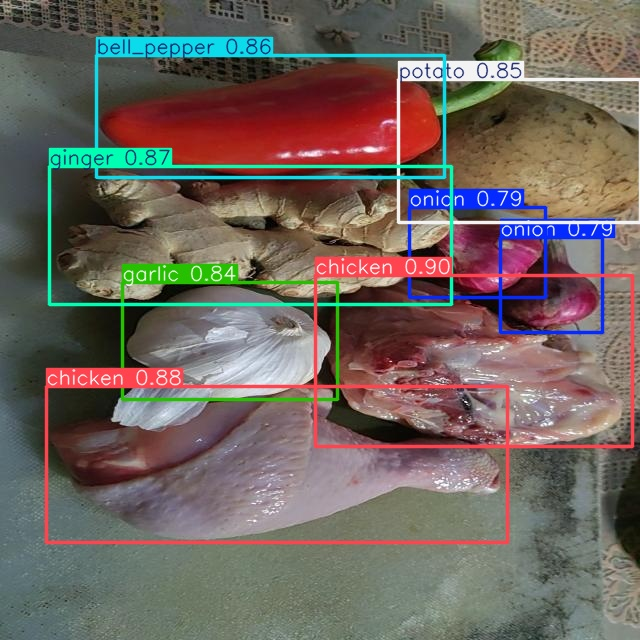

In [ ]:
"""
from IPython.display import Image, display

# Display the result
prediction_path = "/content/runs/detect/predict/imageeee.jpg"  # Update with the actual path
display(Image(filename=prediction_path))
"""

In [ ]:
"""
import requests

# Public Google Drive link example
drive_link = "https://drive.google.com/file/d/1Yc8dq75dvWOxW9OBk3LLepGf2pUqTjeT/view?usp=sharing"
file_id = drive_link.split('/')[-2]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the image
response = requests.get(download_url)
image_path = "image3.jpg"  # Save the image locally
with open(image_path, "wb") as file:
    file.write(response.content)

print(f"Image downloaded to {image_path}")
"""

Image downloaded to image3.jpg


In [ ]:
"""
# Predict the image
results = model.predict(source=image_path, save=True, conf=0.25)

# Display the results
print("Prediction complete!")
print(results)
"""


image 1/1 /content/image3.jpg: 640x640 1 bell_pepper, 2 chickens, 1 garlic, 1 ginger, 2 onions, 1 potato, 213.6ms
Speed: 4.4ms preprocess, 213.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
Prediction complete!
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'bay_leaf', 1: 'bell_pepper', 2: 'broccoli', 3: 'cabbage', 4: 'carrot', 5: 'cauliflower', 6: 'chicken', 7: 'chickpeas', 8: 'coriander', 9: 'cucumber', 10: 'egg', 11: 'eggplant', 12: 'fish', 13: 'garlic', 14: 'ginger', 15: 'kumquat', 16: 'lemon', 17: 'long_pepper', 18: 'mutton', 19: 'okra', 20: 'onion', 21: 'pork', 22: 'potato', 23: 'pumpkin', 24: 'radish', 25: 'salt', 26: 'shrimp', 27: 'small_pepper', 28: 'spring_onion', 29: 'tofu', 30: 'tomato', 31: 'turmeric'}
obb: None
orig_img: array([[[ 23,  29,  40],
        [ 31,  37,  48],
        [ 74,  82,  95],
        ...,
       

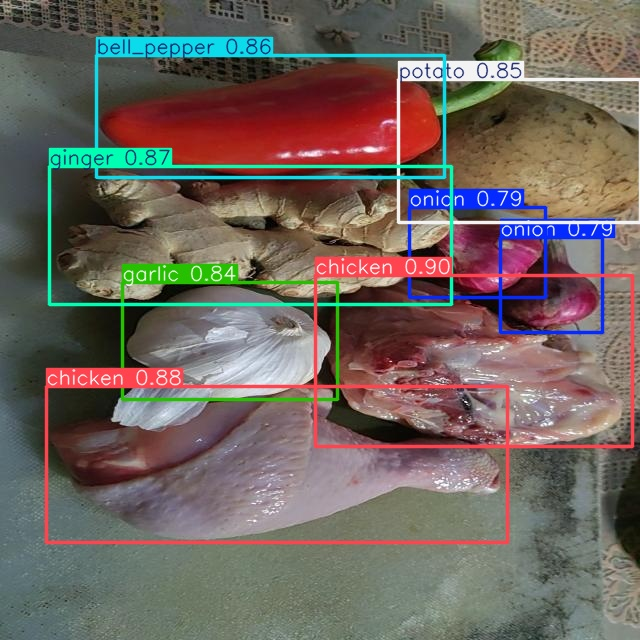

In [ ]:
"""
from IPython.display import Image, display

# Display the result
prediction_path = "/content/runs/detect/predict/image3.jpg"  # Update with the actual path
display(Image(filename=prediction_path))
"""

# **Testing pakai gambar lokal**

In [ ]:
!unzip bahan\ makanan.zip -d trial

Archive:  bahan makanan.zip
   creating: trial/bahan makanan trial/
  inflating: trial/bahan makanan trial/bahan makanan1.jpg  
  inflating: trial/bahan makanan trial/bahan makanan2.jpg  
  inflating: trial/bahan makanan trial/bahan makanan3.jpg  
  inflating: trial/bahan makanan trial/bahan makanan4.jpg  
  inflating: trial/bahan makanan trial/bahan makanan5.jpg  
  inflating: trial/bahan makanan trial/bahan makanan6.jpg  
  inflating: trial/bahan makanan trial/bahan makanan7.jpg  


In [ ]:
# predict image
image_path = "/content/trial/bahan makanan trial/bahan makanan1.jpg"
results = model.predict(source=image_path, save=True, conf=0.25)

# Display the results
print("Prediction complete!")
print(results)


image 1/1 /content/trial/bahan makanan trial/bahan makanan1.jpg: 448x640 (no detections), 437.5ms
Speed: 16.5ms preprocess, 437.5ms inference, 14.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
Prediction complete!
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'bay_leaf', 1: 'bell_pepper', 2: 'broccoli', 3: 'cabbage', 4: 'carrot', 5: 'cauliflower', 6: 'chicken', 7: 'chickpeas', 8: 'coriander', 9: 'cucumber', 10: 'egg', 11: 'eggplant', 12: 'fish', 13: 'garlic', 14: 'ginger', 15: 'kumquat', 16: 'lemon', 17: 'long_pepper', 18: 'mutton', 19: 'okra', 20: 'onion', 21: 'pork', 22: 'potato', 23: 'pumpkin', 24: 'radish', 25: 'salt', 26: 'shrimp', 27: 'small_pepper', 28: 'spring_onion', 29: 'tofu', 30: 'tomato', 31: 'turmeric'}
obb: None
orig_img: array([[[17, 21, 22],
        [18, 23, 24],
        [18, 22, 27],
        ...,
        [35, 56, 83],
        

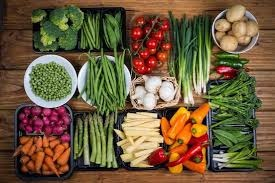

In [ ]:
from IPython.display import Image, display
import os

# Display the result
prediction_path = "/content/runs/detect/predict/bahan makanan1.jpg"

if os.path.exists(prediction_path):
    # Tampilkan gambar
    display(Image(filename=prediction_path))
else:
    print(f"File tidak ditemukan: {prediction_path}")

In [ ]:
food_items = [results[0].names[int(cls)] for cls in results[0].boxes.cls]

# Menyaring hasil agar hanya nama unik yang dimasukkan ke dalam list
unique_food_items = list(set(food_items))

# Menampilkan hasil sebagai list
print(unique_food_items)

['onion', 'ginger', 'chicken', 'bell_pepper', 'potato', 'garlic']


In [ ]:
food_items = list({results.names[int(cls)] for cls in results.boxes.cls})

# Gabungkan nama-nama bahan makanan menjadi satu string
food_list = ', '.join(food_items)

# Menampilkan hasilnya
print(food_list)

In [ ]:
from PIL import Image
import pytesseract

# Path gambar hasil deteksi
image_path = "/content/runs/detect/predict/imageeee.jpg"

# Membuka gambar
image = Image.open(image_path)

# Deteksi teks menggunakan Tesseract
detected_text = pytesseract.image_to_string(image)

# Menampilkan teks yang terdeteksi
print("Daftar objek yang terdeteksi:")
print(detected_text)


In [ ]:
detected.boxes.cls

tensor([ 1.,  6., 14.,  6.], device='cuda:0')